#### ARIMA=AutoregRessive Integrated Moving Average

In [1]:
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

scipy: 0.19.1
numpy: 1.13.1
matplotlib: 1.5.3
pandas: 0.20.3
sklearn: 0.18
statsmodels: 0.8.0


#### Handling error
/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools

In [10]:
import numpy as np
#import pandas as pd
import pandas.tseries as pd
import math
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import csv
import glob

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
%matplotlib inline
%pylab inline
filename = '/home/octo/Dropbox'+ '/SPY18Dec.csv'

Populating the interactive namespace from numpy and matplotlib


In [4]:
# loading csv file
def get_csv_pd(path):
    #spy_pd=pd.read_csv('C:\\Users\Michal\Dropbox\IB_data\SPY.csv',sep=' ',names=['askPrice','askSize','bidPrice','bidSize'],index_col=0,parse_dates=True)
    #spy_pd=pd.read_csv(path+'\SPY.csv',sep=',',names=['askPrice','askSize','bidPrice','bidSize'],index_col=0,parse_dates=True)
    spy_pd=pd.read_csv(path,sep=',',dtype={'askPrice':np.float32,'askSize':np.float32,
                                           'bidPrice':np.float32,'bidSize':np.float32},index_col=0,parse_dates=True)
    #spy_pd = pd.read_csv(path, usecols=['askPrice','askSize','bidPrice','bidSize'], engine='python', skipfooter=3)
    return spy_pd

def get_csv_pd_notime(path):
    #spy_pd=pd.read_csv('C:\\Users\Michal\Dropbox\IB_data\SPY.csv',sep=' ',names=['askPrice','askSize','bidPrice','bidSize'],index_col=0,parse_dates=True)
    #spy_pd=pd.read_csv(path+'\SPY.csv',sep=',',names=['askPrice','askSize','bidPrice','bidSize'],index_col=0,parse_dates=True)
    spy_pd = pd.read_csv(path, usecols=['askPrice','askSize','bidPrice','bidSize'], engine='python', skipfooter=3)
    return spy_pd

'''
def preprocessing(df):
    df.bidPrice=df.loc[:,'bidPrice'].replace(to_replace=0, method='ffill')
    df.bidSize=df.loc[:,'bidSize'].replace(to_replace=0, method='ffill')
    df.askPrice=df.loc[:,'askPrice'].replace(to_replace=0, method='ffill')
    df.askSize=df.loc[:,'askSize'].replace(to_replace=0, method='ffill')
    df=df.dropna()
    # to exclude 0
    df=df[df['bidPrice']>df.bidPrice.mean()-df.bidPrice.std()]
    df=df[df['askPrice']>df.askPrice.mean()-df.askPrice.std()]
    df['mid']=(df.askPrice+df.bidPrice)/2
    df['vwap']=((df.loc[:,'bidPrice']*df.loc[:,'bidSize'])+(df.loc[:,'askPrice']*df.loc[:,'askSize']))/(df.loc[:,'bidSize']+df.loc[:,'askSize'])
    df['spread']=df.vwap-(df.askPrice+df.bidPrice)/2
    df['v']=(df.askPrice+df.bidPrice)/2-((df.askPrice+df.bidPrice)/2).shift(60)
    df['return']=(df.askPrice/df.bidPrice.shift(1))-1
    df['sigma']=df.spread.rolling(60).std()
    return df
'''    
def preprocessing(df):
    df=df.dropna()
    # to exclude 0
    df=df[df['bidPrice']>df.bidPrice.mean()-df.bidPrice.std()]
    df=df[df['askPrice']>df.askPrice.mean()-df.askPrice.std()]
    df['mid']=(df.askPrice+df.bidPrice)/2
    df['vwap']=((df.loc[:,'bidPrice']*df.loc[:,'bidSize'])+(df.loc[:,'askPrice']*df.loc[:,'askSize']))/(df.loc[:,'bidSize']+df.loc[:,'askSize'])
    df['spread']=df.vwap-df.mid
    df['v']=(df.mid-df.mid.shift(60))
    df['mom']=np.where(np.logical_and((df.mid-df.mid.shift(12))!=0,df.v!=0),(df.mid-df.mid.shift(12))/df.v,0)
    df['return']=(df.askPrice/df.bidPrice.shift(1))-1
    #df['ret'] = np.log(df.Close/df.Close.shift(1))
    df['sigma']=df.spread.rolling(60).std()
    #df['sigma']=df.Close.rolling(5).std()
    df['high']=df.askPrice.rolling(5).max()
    df['low']=df.bidPrice.rolling(5).min()
    
    #df['mom']=np.where(np.logical_and(df.vel_c==1,df.Close>df.price),1,np.where(np.logical_and(df.vel_c==-1,df.Close<df.price),-1,0))
    #flagD=np.logical_and(np.logical_and(df.Close.shift(10)<df.Close.shift(15),df.Close.shift(15)< df.Close.shift(20)),df.Close< df.Close.shift(10))
    #flagU=np.logical_and(np.logical_and(df.Close.shift(15)>df.Close.shift(20),df.Close.shift(10)> df.Close.shift(15)),df.Close> df.Close.shift(10))
    #df['UD']= np.where(flagU,-1,np.where(flagD,1,0))
    
    #df['P']=(df.High+df.Low+df.Close)/3
    #df['UT']=(pd.rolling_max(df.High,60)+pd.rolling_max(df.P+df.High-df.Low,60))*0.5
    #df['DT']=(pd.rolling_min(df.Low,60)+pd.rolling_min(df.P+df.High-df.Low,60))*0.5
    #df['BA']=np.where(df.Close<=df.DT,-1,np.where(df.Close>=df.UT,1,0))# below or above
    return df
'''
def normalise_min_max(df,window_length=60):
    dfn=df/df/ix[0]
    return dfn

def normalise_min_max(df,window_length=60):
    dfn=(df-df.rolling(window_length).min())/(df.rolling(window_length).max()-df.rolling(window_length).min())
    return dfn

def de_normalise_min_max(data,df,window_length=60):
    dn=(df*(data.rolling(window_length).max()-data.rolling(window_length).min()))+data.rolling(window_length).min()
    return dn
'''    
def normalise(dfn,window_length=60):
    dfn['midN']=dfn.mid/dfn.mid.shift(60)
    dfn['vwapN']=dfn.vwap/dfn.mid.shift(60)
    #dfn['highN']=dfn.high/dfn.high.shift(60)
    #dfn['lowN']=dfn.low/dfn.low.shift(60)
    dfn['HL']=(dfn.high-dfn.low)/dfn.mid.shift(60)
    dfn=dfn[['midN','vwapN','HL','spread','v','mom','return','sigma']]
    return dfn

In [5]:
#testing
data=get_csv_pd(filename)
data=preprocessing(data)
data=data.dropna()

In [6]:
data.tail()

,askPrice,askSize,bidPrice,bidSize,mid,vwap,spread,v,mom,return,sigma,high,low
2017-12-19 09:24:27.494064,268.380005,52.0,268.369995,132.0,268.375,268.372833,-0.002167,-0.01001,1.0,0.000037,0.002835,268.380005,268.369995
2017-12-19 09:24:30.229113,268.380005,50.0,268.369995,132.0,268.375,268.372742,-0.002258,-0.01001,0.5,0.000037,0.002810,268.380005,268.369995
2017-12-19 09:24:33.545713,268.380005,50.0,268.369995,152.0,268.375,268.372467,-0.002533,-0.01001,0.5,0.000037,0.002789,268.380005,268.369995
2017-12-19 09:24:37.270081,268.380005,41.0,268.369995,152.0,268.375,268.372131,-0.002869,-0.01001,0.0,0.000037,0.002772,268.380005,268.369995
2017-12-19 09:24:40.471072,268.380005,41.0,268.369995,157.0,268.375,268.372070,-0.002930,-0.01001,0.0,0.000037,0.002745,268.380005,268.369995


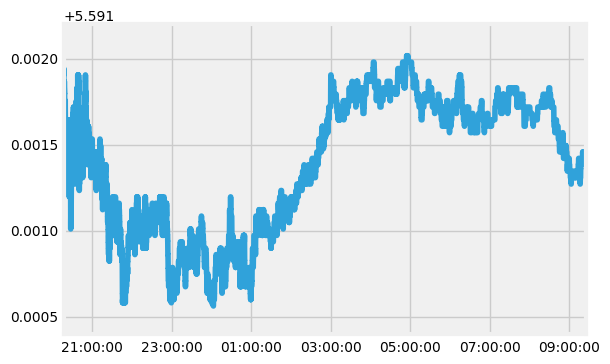

In [7]:
X = data.mid.astype('float32')
ts_log = np.log(X)
plt.plot(ts_log)

In [11]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [16]:
'''
## Log normalization
def arima_processing(df):
    #data=df[['vwap','mid']]
    #http://localhost:8888/notebooks/Dropbox/DataScience/ML_20Sep.ipynb
    #ARIMA-preprocessingdf=df.dropna()
    df['Lvwap']=np.log(df.vwap)
    df['Lmid']=np.log(df.mid)
    df['LDvwap']=df.Lvwap-df.Lvwap.shift(60)
    df['LDmid']=df.Lmid-df.Lmid.shift(60)
    df=df.dropna()
    return df
'''
## Lag normalization
def arima_processing(data_):
    dfn=normalise(data_).dropna()
    return dfn

In [17]:
data_=arima_processing(data)

In [18]:
#data_=data.tail(10000)

In [19]:
data_.tail()

,midN,vwapN,HL,spread,v,mom,return,sigma
2017-12-19 09:24:27.494064,0.999963,0.999955,0.000037,-0.002167,-0.01001,1.0,0.000037,0.002835
2017-12-19 09:24:30.229113,0.999963,0.999954,0.000037,-0.002258,-0.01001,0.5,0.000037,0.002810
2017-12-19 09:24:33.545713,0.999963,0.999953,0.000037,-0.002533,-0.01001,0.5,0.000037,0.002789
2017-12-19 09:24:37.270081,0.999963,0.999952,0.000037,-0.002869,-0.01001,0.0,0.000037,0.002772
2017-12-19 09:24:40.471072,0.999963,0.999952,0.000037,-0.002930,-0.01001,0.0,0.000037,0.002745


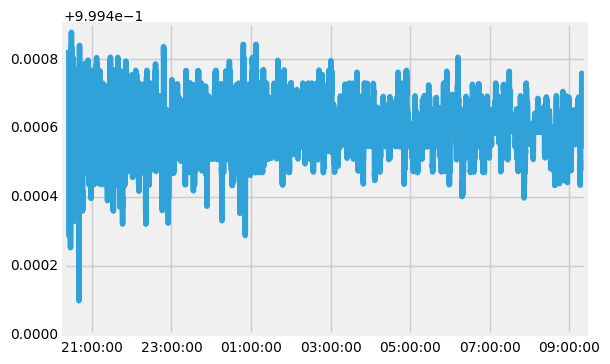

In [20]:
#Take first difference:
## Log value
#plt.plot(data.LDvwap)
## Lag normalization
plt.plot(data.vwapN)

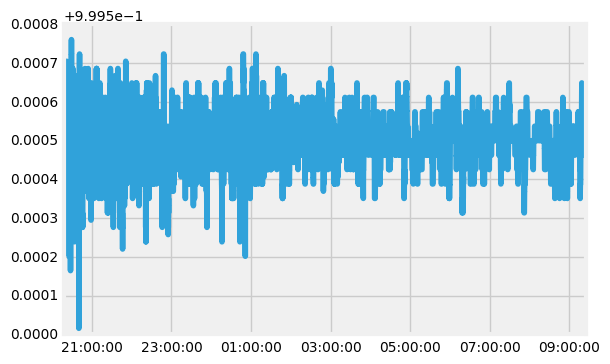

In [21]:
#Take first difference:
plt.plot(data.midN)

In [23]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#from statsmodels.graphics.tsaplots import plot_pacf
#from matplotlib import pyplot as plt
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

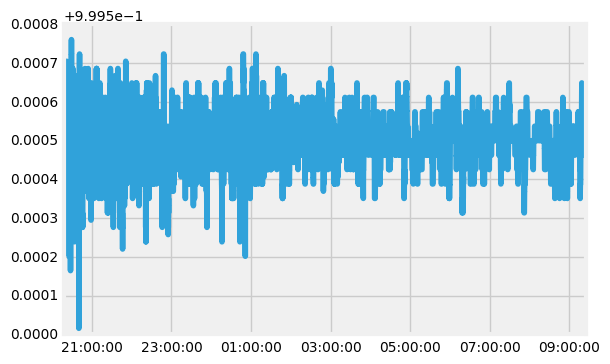

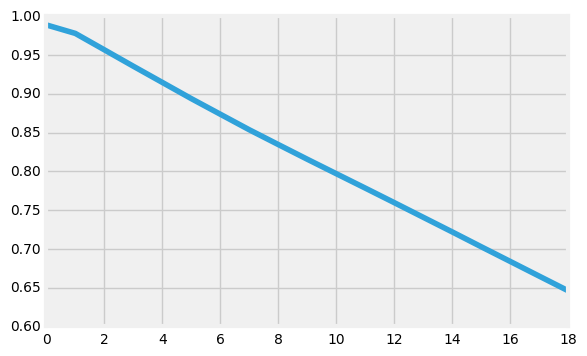

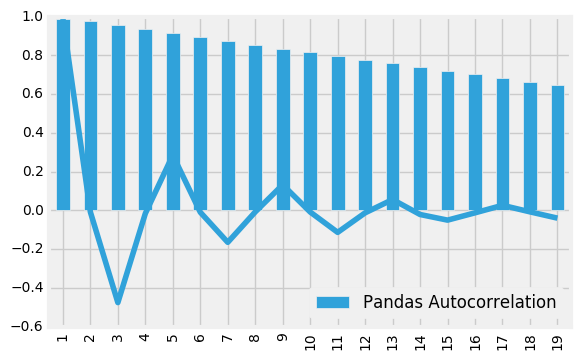

(-14.5084844169024,
 5.7764051324086374e-27,
 1,
 37878,
 {'1%': -3.4305226528120536,
  '10%': -2.5668106165626257,
  '5%': -2.861616308458943},
 -758606.07332068484)

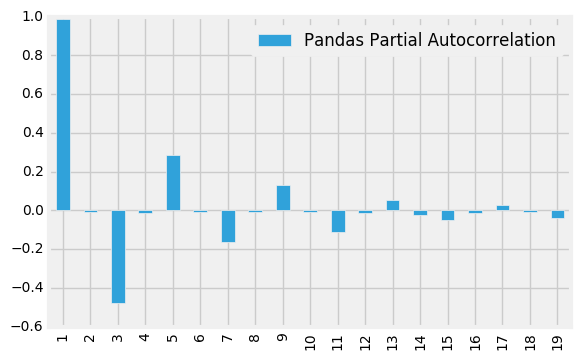

In [25]:
ret=data_.midN
plt.plot(ret)
plt.show()
acf_1 =  acf(ret)[1:20]
plt.plot(acf_1)
plt.show()
test_df = pandas.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 =  pacf(ret)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pandas.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
result = ts.adfuller(ret, 1)
result

There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q). Together these three parameters account for seasonality, trend, and noise in datasets:

p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.
d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.
q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

When dealing with seasonal effects, we make use of the seasonal ARIMA, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the non-seasonal parameters described above, while (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

The seasonal ARIMA method can appear daunting because of the multiple tuning parameters involved. In the next section, we will describe how to automate the process of identifying the optimal set of parameters for the seasonal ARIMA time series model.



In [26]:
data.tail()

,askPrice,askSize,bidPrice,bidSize,mid,vwap,spread,v,mom,return,sigma,high,low,midN,vwapN,HL
2017-12-19 09:24:27.494064,268.380005,52.0,268.369995,132.0,268.375,268.372833,-0.002167,-0.01001,1.0,0.000037,0.002835,268.380005,268.369995,0.999963,0.999955,0.000037
2017-12-19 09:24:30.229113,268.380005,50.0,268.369995,132.0,268.375,268.372742,-0.002258,-0.01001,0.5,0.000037,0.002810,268.380005,268.369995,0.999963,0.999954,0.000037
2017-12-19 09:24:33.545713,268.380005,50.0,268.369995,152.0,268.375,268.372467,-0.002533,-0.01001,0.5,0.000037,0.002789,268.380005,268.369995,0.999963,0.999953,0.000037
2017-12-19 09:24:37.270081,268.380005,41.0,268.369995,152.0,268.375,268.372131,-0.002869,-0.01001,0.0,0.000037,0.002772,268.380005,268.369995,0.999963,0.999952,0.000037
2017-12-19 09:24:40.471072,268.380005,41.0,268.369995,157.0,268.375,268.372070,-0.002930,-0.01001,0.0,0.000037,0.002745,268.380005,268.369995,0.999963,0.999952,0.000037


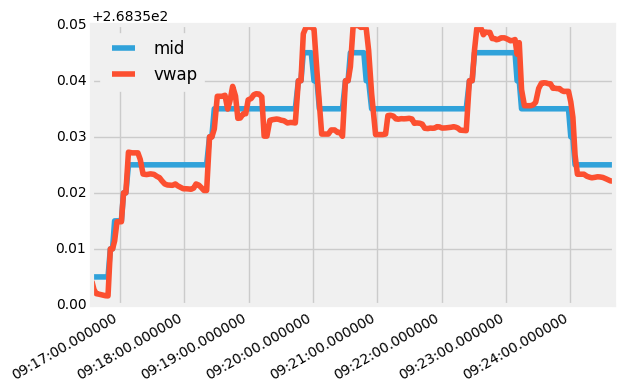

In [29]:
from matplotlib import pyplot
data[['mid','vwap']].tail(200).plot()
pyplot.show()

In [30]:
print(data.describe())

           askPrice       askSize      bidPrice       bidSize           mid  \
count  37940.000000  37940.000000  37940.000000  37940.000000  37940.000000   
mean     268.296692     99.633896    268.282867     92.608009    268.294830   
std        0.122090    105.618942      0.124438    100.686211      0.120254   
min      268.149994      1.000000    268.160004      1.000000    268.154999   
25%      268.279999     22.000000    268.269989     22.000000    268.274994   
50%      268.380005     52.000000    268.369995     55.000000    268.375000   
75%      268.459991    169.000000    268.450012    138.000000    268.455017   
max      268.549988    776.000000    268.540009   1371.000000    268.544983   

               vwap        spread             v           mom        return  \
count  37940.000000  37940.000000  37940.000000  37940.000000  37940.000000   
mean     268.294037      0.000097     -0.000182      0.112624      0.000037   
std        0.120689      0.003601      0.019770    

In [31]:
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot

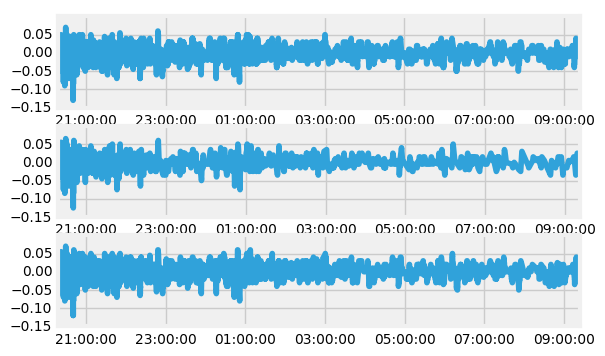

In [32]:
groups = data.v.groupby(np.where(data.spread>0,1,0)+np.where(data.spread<0,-1,0))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()

#### BOX and WHISKER plot

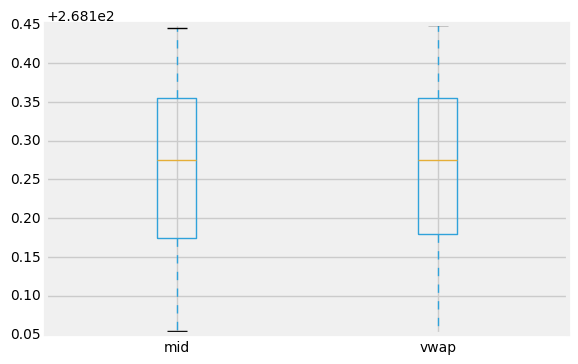

In [33]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot

data[['mid','vwap']].boxplot()
pyplot.show()

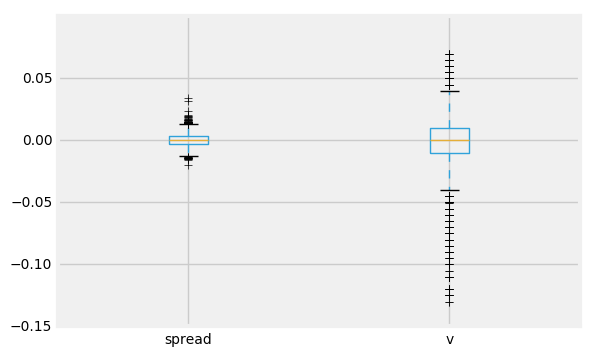

In [34]:
data[['spread','v']].boxplot()
pyplot.show()

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

constant mean
constant variance
an autocovariance that does not depend on time.

In [41]:
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
import pandas as pd 

In [42]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

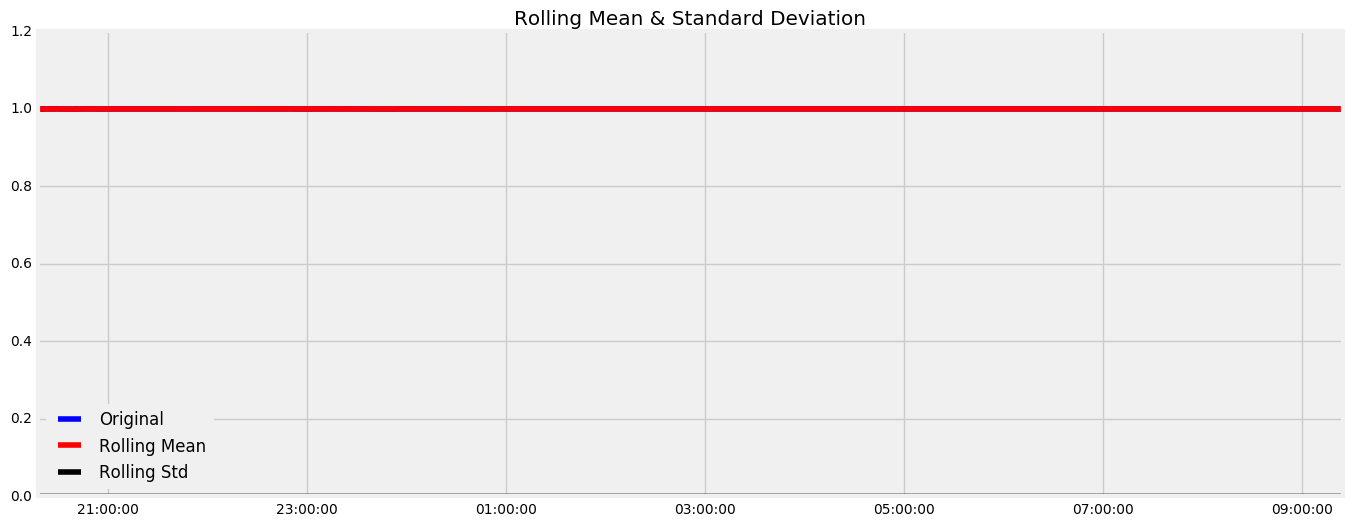

Results of Dickey-Fuller Test:
Test Statistic                   -26.185307
p-value                            0.000000
#Lags Used                        53.000000
Number of Observations Used    37826.000000
Critical Value (1%)               -3.430523
Critical Value (5%)               -2.861616
Critical Value (10%)              -2.566811
dtype: float64


In [43]:
rcParams['figure.figsize'] = 15, 6
test_stationarity(data_.midN)
plt.show()

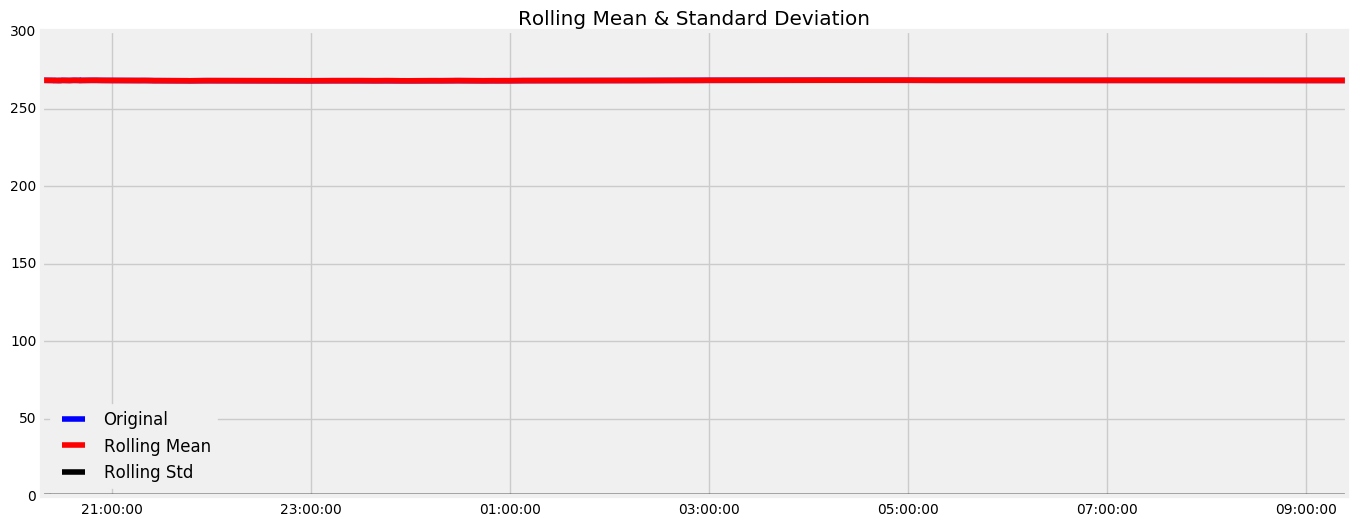

Results of Dickey-Fuller Test:
Test Statistic                    -2.775478
p-value                            0.061863
#Lags Used                        20.000000
Number of Observations Used    37919.000000
Critical Value (1%)               -3.430522
Critical Value (5%)               -2.861616
Critical Value (10%)              -2.566811
dtype: float64


In [44]:
rcParams['figure.figsize'] = 15, 6
test_stationarity(data.mid)
plt.show()

In [47]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

Parsing time index

In [45]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')

In [58]:
series = read_csv('/home/octo/Dropbox/SPY18Dec.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.tail())

                            askPrice  askSize  bidPrice  bidSize
2017-12-19 09:24:27.494064    268.38     52.0    268.37    132.0
2017-12-19 09:24:30.229113    268.38     50.0    268.37    132.0
2017-12-19 09:24:33.545713    268.38     50.0    268.37    152.0
2017-12-19 09:24:37.270081    268.38     41.0    268.37    152.0
2017-12-19 09:24:40.471072    268.38     41.0    268.37    157.0


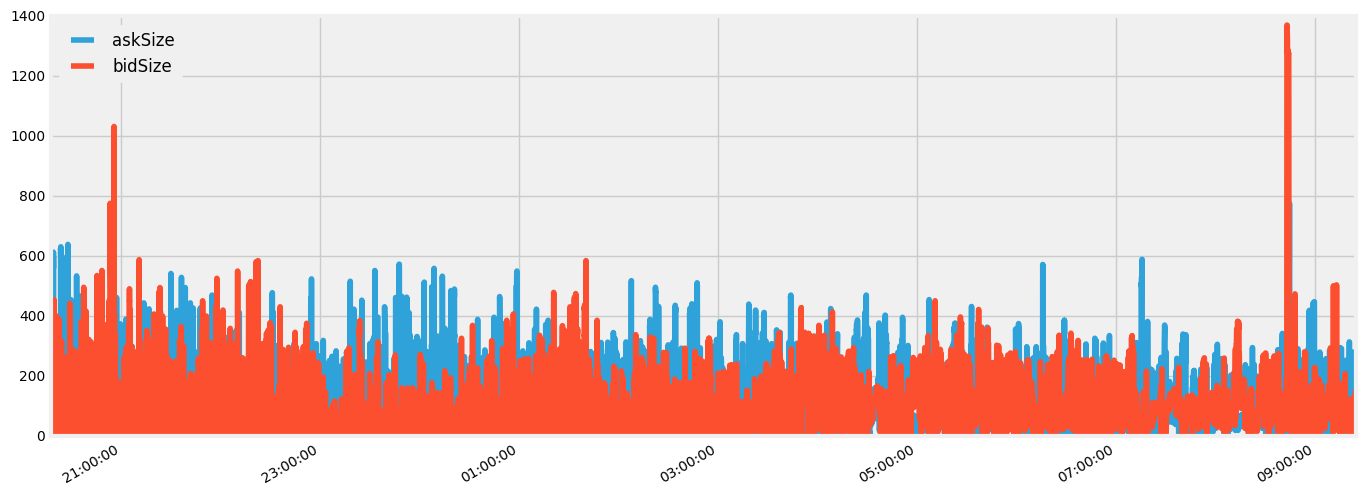

In [59]:
series[['askSize','bidSize']].plot()
pyplot.show()

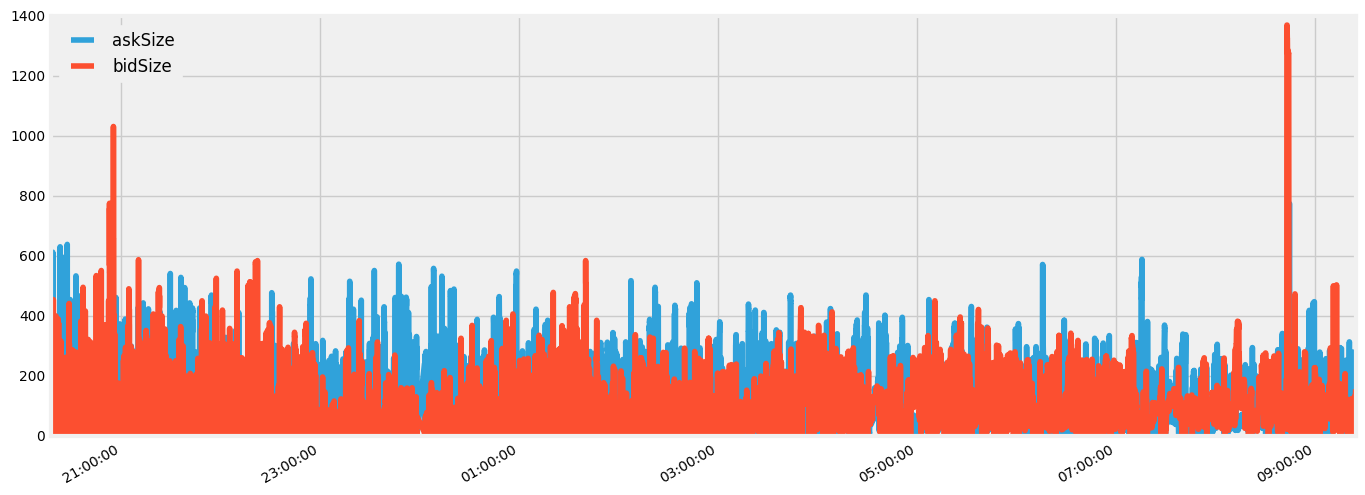

In [60]:
data[['askSize','bidSize']].plot()
pyplot.show()

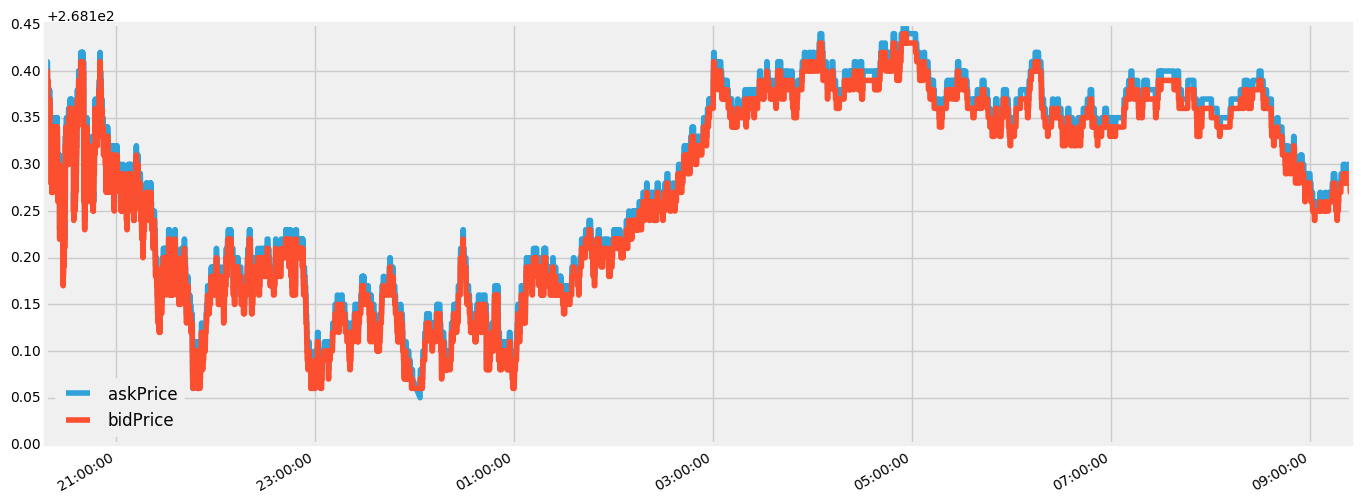

In [54]:
data = data.dropna()
data[['askPrice','bidPrice']].plot()
pyplot.show()

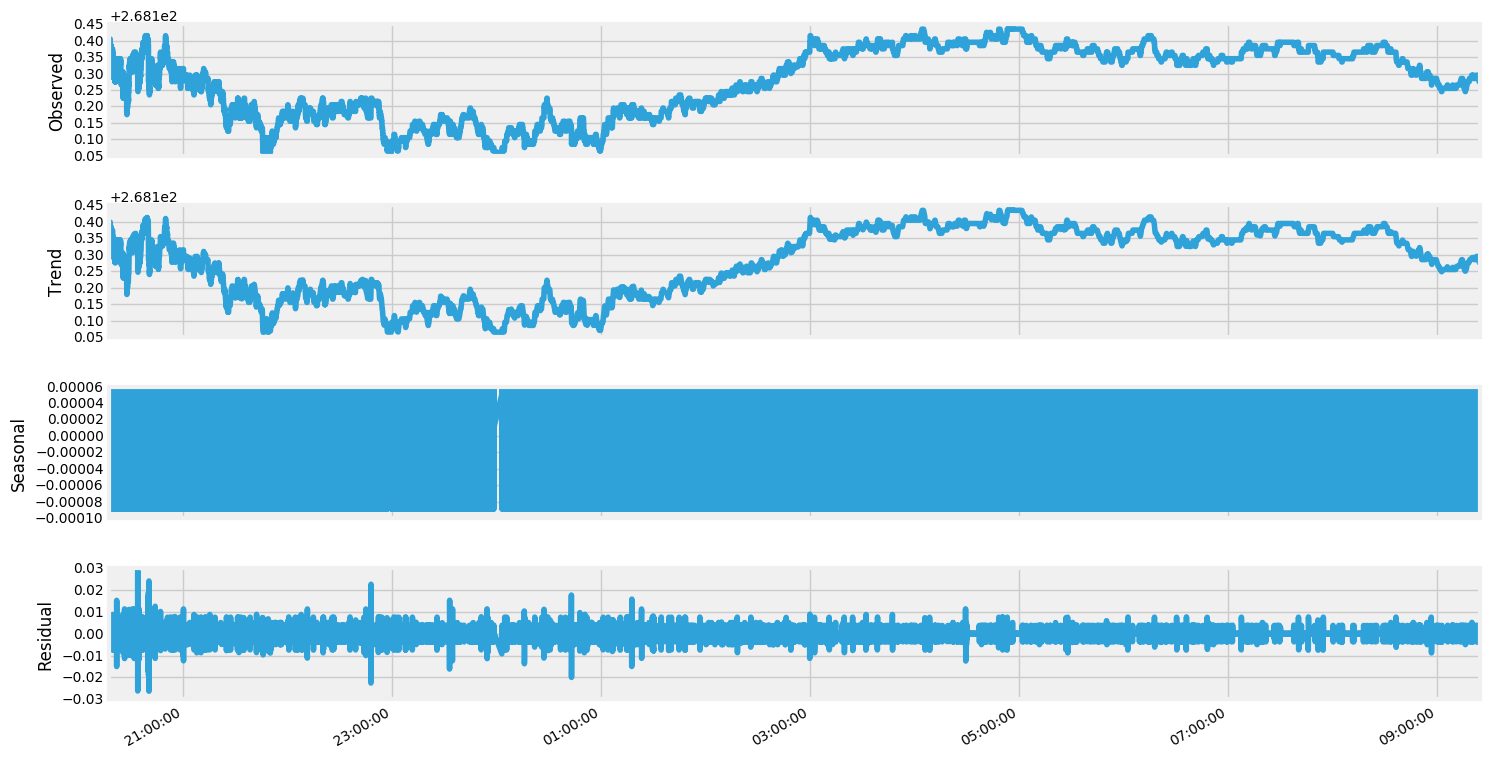

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.mid, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

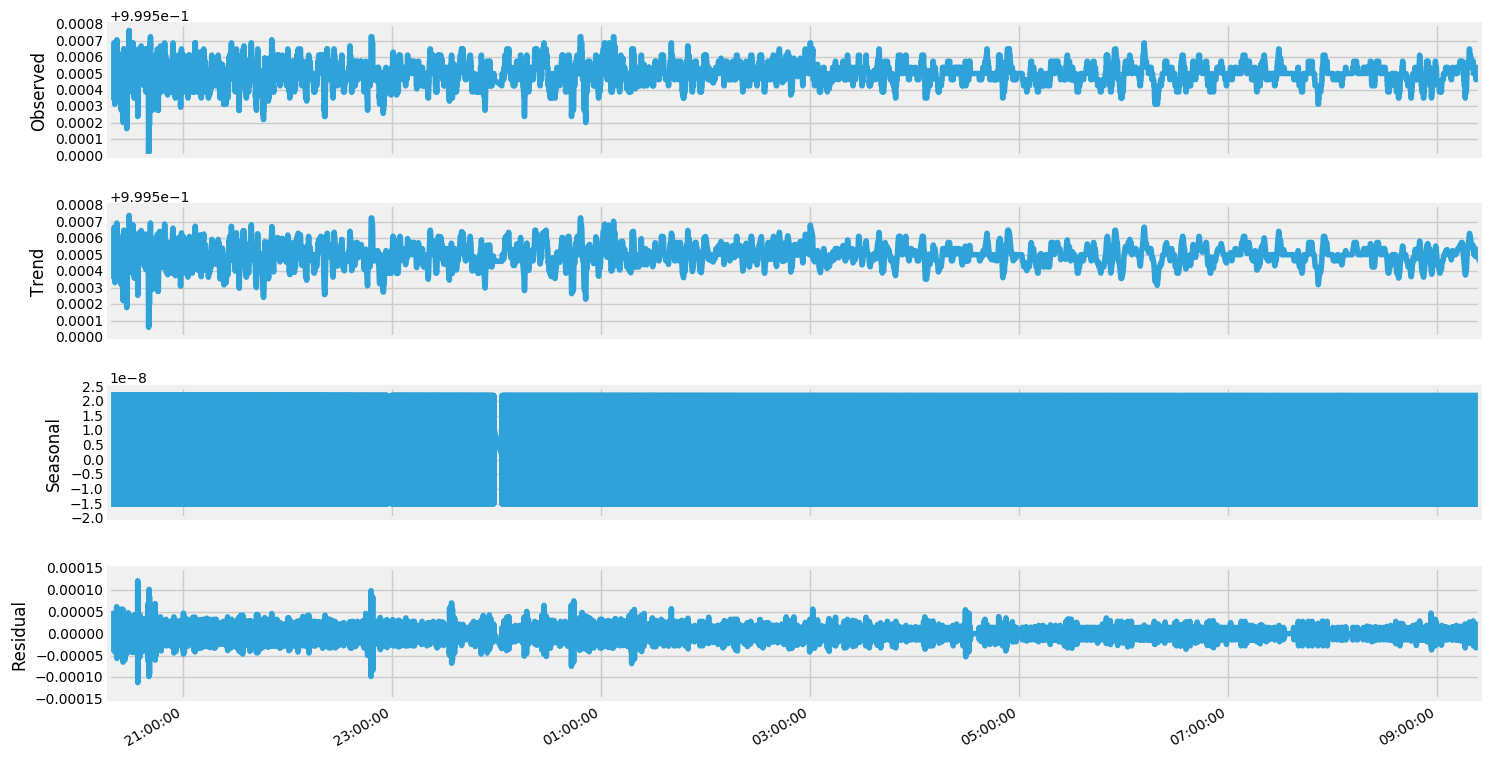

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_.midN, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [55]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid 